In [2]:
import numpy as np
import pandas as pd
from scipy.stats import t
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression


In [3]:
bedrooms = [1,1,1,2,2,2,2,3,3,3,3,3,3,3,4,4,4,5,5,6] 
prices = [120,133,139,185,148,160,192,205,244,213,236,280,275,273,312,311,304,415,396,488] 



In [4]:
x = np.array(bedrooms)
y = np.array(prices)

Extract a random sample of size 10


In [5]:
x_samp = np.random.choice(x, size = 10)
x_samp

array([2, 2, 1, 3, 3, 3, 2, 4, 3, 3])

In [6]:
y_samp = np.random.choice(y, size = 10)
y_samp

array([213, 304, 160, 415, 311, 192, 213, 205, 213, 133])

Compute the mean and standard deviation of the sample


In [7]:
x_y_samp_mean = np.mean([x_samp, y_samp], axis=1)
x_y_samp_mean

array([  2.6, 235.9])

In [8]:
x_y_samp_std = np.std([x_samp, y_samp], axis = 1)
x_y_samp_std

array([ 0.8       , 79.47257389])

Compute the the mean of the population


In [9]:
x_y_mean = np.mean([x,y], axis = 1)
x_y_mean

array([  3.  , 251.45])

Computer the confidence interval of 95% using the sample 


In [11]:
z_95 = 1.96
x_samp_mean = np.mean(x_samp)
x_std = np.std(x_samp)
std_error = x_std / np.sqrt(len(x_samp))

lower_bound_x = x_samp_mean - z_95 * std_error
upper_bound_x = x_samp_mean + z_95 * std_error

print('confidence intervals 95% upper bound and lower bound is :',round(lower_bound_x,2),'&', round(upper_bound_x,2))


confidence intervals 95% upper bound and lower bound is : 2.1 & 3.1


In [12]:
z_95 = 1.96
y_samp_mean = np.mean(y_samp)
y_std = np.std(y_samp)
std_error = y_std / np.sqrt(len(y_samp))

lower_bound_y = y_samp_mean - z_95 * std_error
upper_bound_y = y_samp_mean + z_95 * std_error

print('confidence intervals 95% upper bound and lower bound is :',round(lower_bound_y,2),'&', round(upper_bound_y,2))

confidence intervals 95% upper bound and lower bound is : 186.64 & 285.16


In [13]:
#Compute the covariance and the correlation between the two variables
x_y_cov = np.cov([x,y])
x_y_cov

array([[1.89473684e+00, 1.33894737e+02],
       [1.33894737e+02, 1.00161553e+04]])

**The 2x2 array returned by np.cov(a,b) has elements equal to**

cov(a,a)  cov(a,b)

cov(a,b)  cov(b,b) 

In [14]:
#Build a regression model and estimate the regression parameters (slope and intercept).
#f(bedrooms) = prices =  slope * bedrooms + intercept
#f(x) = a * x + b
x = np.array(bedrooms).reshape(-1, 1)

model = LinearRegression().fit(x,y)
r_sq = model.score(x, y)
print(f'Coefficient of determintaion: {round(r_sq, 4)}')
print(f'Intercept: {round(model.intercept_, 4)}')
print(f'Slope: {round(model.coef_[0], 4)}')


Coefficient of determintaion: 0.9447
Intercept: 39.45
Slope: 70.6667


In [49]:
#Predict the house price for a house with 7 rooms
y_pred = model.predict([[7]]).round(4) #x=7
print(f'7 bedroom house price will be: {y_pred}')

y_predic = model.predict(x).round(4)
print(y_predic)

7 bedroom house price will be: [534.1167]
[110.1167 110.1167 110.1167 180.7833 180.7833 180.7833 180.7833 251.45
 251.45   251.45   251.45   251.45   251.45   251.45   322.1167 322.1167
 322.1167 392.7833 392.7833 463.45  ]


Estimate the upper bound and the lower bounds of the prediction interval of a house with 7 rooms

Alpha = 0.1

N = 20

Df = N-2


---



LCL:[64.23295133]
LCL:[438.66704867]
The prediction 251.450000 with 95 confidence lies between [64.232951, 438.667049]


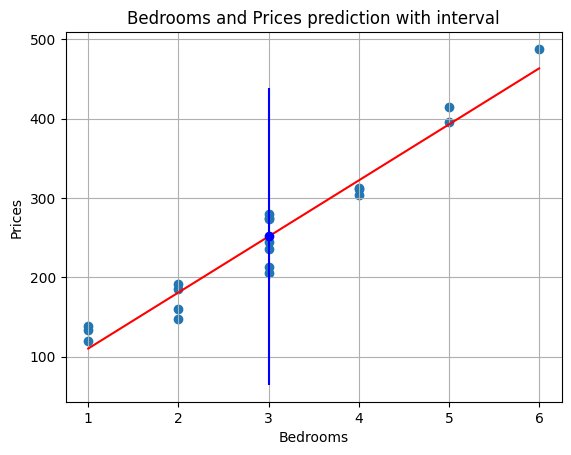

In [53]:
n = len(y)
alpha = 0.1
df = n-2
dof = n-2
x_new = 3
y_hat = model.predict(np.array([[x_new]]))
re = np.square(y - y_hat).sum()
se = np.sqrt(np.square(y - y_hat).sum()/(n-2))
se *= (1+(1/n) + np.square(x_new - x.mean())/(np.square(x-x.mean()).mean()))
t_value = t.ppf(1-alpha/2, df=df)
interval = t_value * se 
LCL = y_hat - t_value * se
UCL = y_hat + t_value * se

print(f"LCL:{LCL}")
print(f"LCL:{UCL}")
print('The prediction %f with 95 confidence lies between [%f, %f]'%(y_hat, LCL, UCL))

pyplot.scatter(x, y)
pyplot.plot(x, y_predic, color = 'red')
pyplot.errorbar(x_new, y_hat, yerr = interval, color = 'blue', fmt = 'o')
pyplot.xlabel('Bedrooms')
pyplot.ylabel('Prices')
pyplot.title('Bedrooms and Prices prediction with interval')
pyplot.grid(True)
pyplot.show()


In [61]:
def prediction_interval(new_value, x, y, y_predic, alpha= 0.05, df = 2):
  n = len(x)
  re = np.sqrt(np.square(y - y_hat).sum()/(n-2))
  se = re * (1+(1/n) + np.square(x_new - x.mean())/(np.square(x-x.mean()).mean()))
  t_value = t.ppf(1-alpha/2, df = df)
  intrval = t_value * se
  pred_val = model.predict(np.array([[new_value]]))[0].round(4)
  LCL = round(pred_val - interval, 4)
  UCL = round(pred_val + interval, 4)
  return pred_val, LCL, UCL

pred_val, LCL, UCL = prediction_interval(5, x, y, y_pred)

print('The prediction %f with %d confidence lies between [%f, %f]'%(y_pred, (1-alpha/2) * 100, LCL, UCL))

The prediction 534.116700 with 95 confidence lies between [205.566300, 580.000300]
